In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#reading our 3 chosen datasets
bankloan_df = pd.read_csv("bankloan.csv")
data_banknote_df = pd.read_csv("data_banknote_authentication.csv")
glasstype_df = pd.read_csv("glasstypePrediction.csv")

In [ ]:
# Data Preprocessing

## Dataset 1: Bankloan
# Handling missing values
bankloan_df.dropna(inplace=True)

In [ ]:
print(bankloan_df.head())

   ID  Age  Experience  Income  ZIP.Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal.Loan  Securities.Account  CD.Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  


In [ ]:
print(data_banknote_df.head())

   Variance_Wavelet  Skewness_Wavelet  Curtosis_Wavelet  Image_Entropy  Class
0           3.62160            8.6661           -2.8073       -0.44699      0
1           4.54590            8.1674           -2.4586       -1.46210      0
2           3.86600           -2.6383            1.9242        0.10645      0
3           3.45660            9.5228           -4.0112       -3.59440      0
4           0.32924           -4.4552            4.5718       -0.98880      0


In [ ]:
print(glasstype_df.head())

        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1


In [ ]:
# Scaling numerical features
scaler = StandardScaler()
bankloan_df[['Age', 'Income', 'CCAvg']] = scaler.fit_transform(bankloan_df[['Age', 'Income', 'CCAvg']])


In [ ]:
## Dataset 2: Data Banknote Authentication
# No preprocessing needed as this dataset is clean

In [ ]:
## Dataset 3: Glasstype Prediction
# Handling null values
glasstype_df.dropna(inplace=True)


In [ ]:
# Encoding categorical variables
glasstype_df = pd.get_dummies(glasstype_df, columns=['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'])

In [ ]:
# Model Implementation

# Split data into features and target
X_bankloan = bankloan_df.drop('Personal.Loan', axis=1)
y_bankloan = bankloan_df['Personal.Loan']

X_data_banknote = data_banknote_df.drop('Class', axis=1)
y_data_banknote = data_banknote_df['Class']

X_glasstype = glasstype_df.drop('Type', axis=1)
y_glasstype = glasstype_df['Type']


In [ ]:
# Split data into train and test sets
X_bankloan_train, X_bankloan_test, y_bankloan_train, y_bankloan_test = train_test_split(X_bankloan, y_bankloan, test_size=0.2, random_state=42)
X_data_banknote_train, X_data_banknote_test, y_data_banknote_train, y_data_banknote_test = train_test_split(X_data_banknote, y_data_banknote, test_size=0.2, random_state=42)
X_glasstype_train, X_glasstype_test, y_glasstype_train, y_glasstype_test = train_test_split(X_glasstype, y_glasstype, test_size=0.2, random_state=42)


In [ ]:
# Initialize models
rf_classifier = RandomForestClassifier(random_state=42)
adaboost_classifier = AdaBoostClassifier(random_state=42)
gradientboost_classifier = GradientBoostingClassifier(random_state=42)

In [ ]:
# Hyperparameter Tuning

# Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7]
}
rf_grid_search = GridSearchCV(rf_classifier, param_grid=rf_param_grid, cv=5)
rf_grid_search.fit(X_bankloan_train, y_bankloan_train)
best_rf_model = rf_grid_search.best_estimator_

In [ ]:
# AdaBoost
adaboost_param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.5, 1.0]
}
adaboost_grid_search = GridSearchCV(adaboost_classifier, param_grid=adaboost_param_grid, cv=5)
adaboost_grid_search.fit(X_data_banknote_train, y_data_banknote_train)
best_adaboost_model = adaboost_grid_search.best_estimator_

In [ ]:
# Gradient Boost
gradientboost_param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.5, 1.0],
    'max_depth': [3, 5, 7]
}
gradientboost_grid_search = GridSearchCV(gradientboost_classifier, param_grid=gradientboost_param_grid, cv=5)
gradientboost_grid_search.fit(X_glasstype_train, y_glasstype_train)
best_gradientboost_model = gradientboost_grid_search.best_estimator_

In [ ]:
# Training and Evaluation

# Random Forest
rf_pred = best_rf_model.predict(X_bankloan_test)
rf_accuracy = accuracy_score(y_bankloan_test, rf_pred)

In [ ]:
# AdaBoost
adaboost_pred = best_adaboost_model.predict(X_data_banknote_test)
adaboost_accuracy = accuracy_score(y_data_banknote_test, adaboost_pred)

In [ ]:
# Gradient Boost
gradientboost_pred = best_gradientboost_model.predict(X_glasstype_test)
gradientboost_accuracy = accuracy_score(y_glasstype_test, gradientboost_pred)

In [ ]:
# Comparison Table
accuracy_table = pd.DataFrame({
    'Dataset': ['Bankloan', 'Data Banknote', 'Glasstype'],
    'Random Forest': [rf_accuracy, None, None],
    'AdaBoost': [None, adaboost_accuracy, None],
    'Gradient Boost': [None, None, gradientboost_accuracy]
})

print("Accuracy Comparison Table:")
print(accuracy_table)

Accuracy Comparison Table:
         Dataset  Random Forest  AdaBoost  Gradient Boost
0       Bankloan          0.987       NaN             NaN
1  Data Banknote            NaN  0.996364             NaN
2      Glasstype            NaN       NaN        0.534884


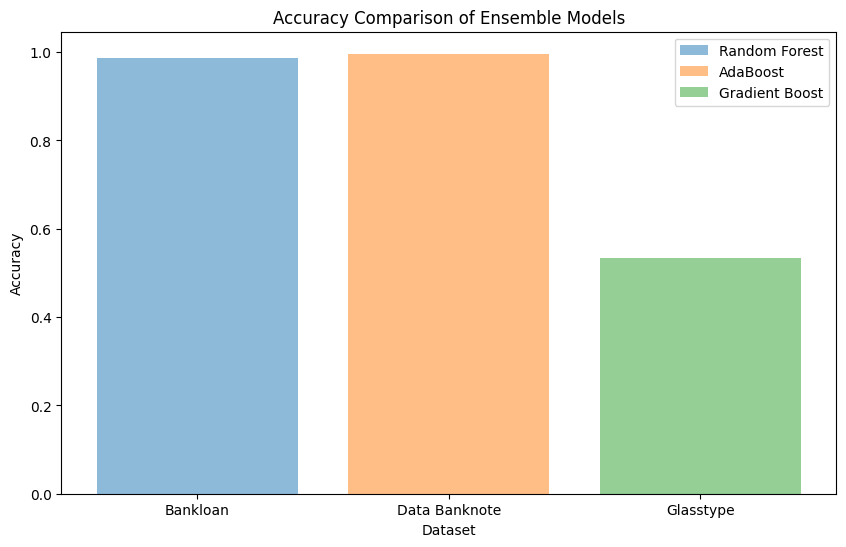

In [ ]:
# Visualization

# Bar Chart
plt.figure(figsize=(10, 6))
plt.bar(accuracy_table['Dataset'], accuracy_table['Random Forest'], label='Random Forest', alpha=0.5)
plt.bar(accuracy_table['Dataset'], accuracy_table['AdaBoost'], label='AdaBoost', alpha=0.5)
plt.bar(accuracy_table['Dataset'], accuracy_table['Gradient Boost'], label='Gradient Boost', alpha=0.5)
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Ensemble Models')
plt.legend()
plt.show()

In [ ]:
# Grid Search Heatmap
# Since we have only one dataset for each model, we won't create a heatmap

In [ ]:
# Define a function to extract grid search results into a dataframe
def extract_results(grid_search):
    results = pd.DataFrame(grid_search.cv_results_)
    params = results.params.apply(pd.Series)
    return pd.concat([params, results[['mean_test_score', 'rank_test_score']]], axis=1)

# Extract results for Random Forest
rf_results_df = extract_results(rf_grid_search)

# Extract results for AdaBoost
adaboost_results_df = extract_results(adaboost_grid_search)

# Extract results for Gradient Boost
gradientboost_results_df = extract_results(gradientboost_grid_search)

<ipython-input-28-c30d18796f63>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(rf_results_df.pivot('max_depth', 'n_estimators', 'mean_test_score'), annot=True, cmap='viridis')


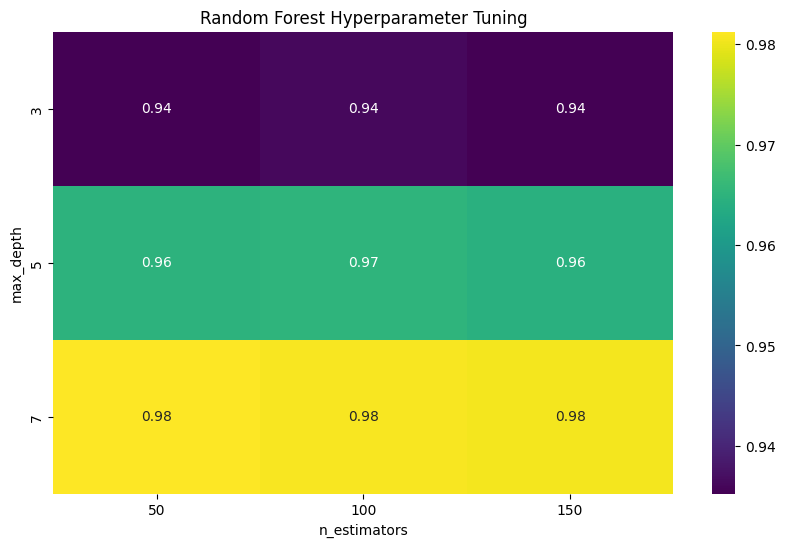

In [ ]:
# Plotting the heatmap for Random Forest
plt.figure(figsize=(10, 6))
sns.heatmap(rf_results_df.pivot('max_depth', 'n_estimators', 'mean_test_score'), annot=True, cmap='viridis')
plt.title('Random Forest Hyperparameter Tuning')
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.show()

<ipython-input-29-c6d1fe42c66f>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(adaboost_results_df.pivot('learning_rate', 'n_estimators', 'mean_test_score'), annot=True, cmap='viridis')


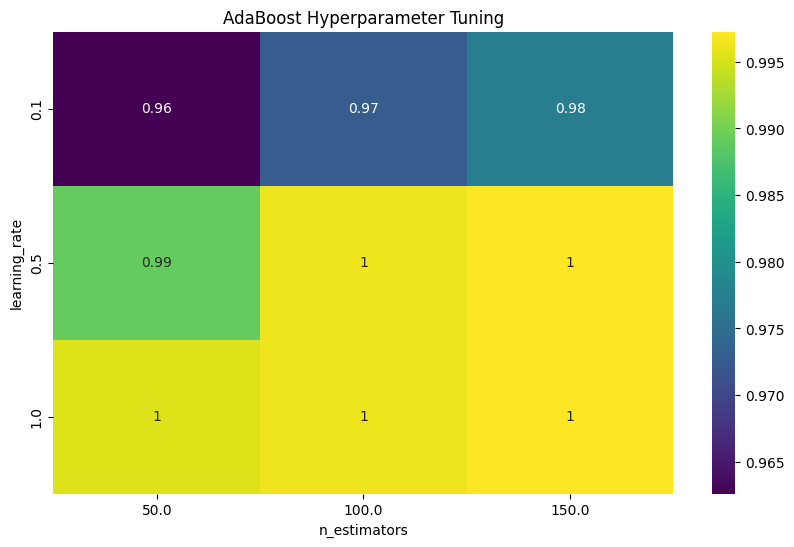

In [ ]:
# Plotting the heatmap for AdaBoost
plt.figure(figsize=(10, 6))
sns.heatmap(adaboost_results_df.pivot('learning_rate', 'n_estimators', 'mean_test_score'), annot=True, cmap='viridis')
plt.title('AdaBoost Hyperparameter Tuning')
plt.xlabel('n_estimators')
plt.ylabel('learning_rate')
plt.show()

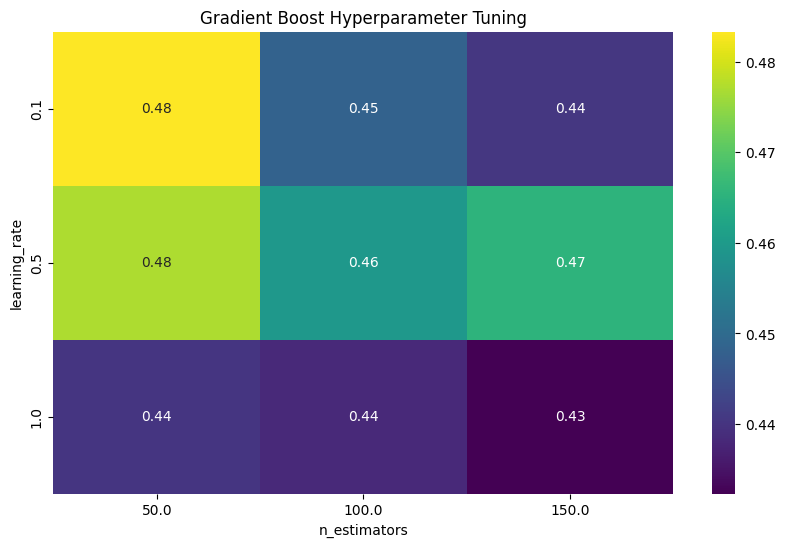

In [ ]:
# Plotting the heatmap for Gradient Boost
plt.figure(figsize=(10, 6))
sns.heatmap(gradientboost_results_df.pivot_table(index='learning_rate', columns='n_estimators', values='mean_test_score'), annot=True, cmap='viridis')
plt.title('Gradient Boost Hyperparameter Tuning')
plt.xlabel('n_estimators')
plt.ylabel('learning_rate')
plt.show()
